# Análise de Cohort
A análise de cohort é uma ferramenta de análise descritiva. Ele agrupa os clientes em cohort mutuamente exclusivas - que são medidas ao longo do tempo. A análise de cohort fornece insights mais profundos do que as chamadas métricas de vaidade. Ele ajuda a entender melhor as tendências de alto nível, fornecendo insights sobre métricas em todo o ciclo de vida do produto e do cliente.


Existem três tipos principais de Cohort. 

- Cohort de tempo: São clientes que se inscreveram para um produto ou serviço durante um determinado período de tempo. A análise dessas coortes mostra o comportamento dos clientes em função do momento em que começaram a usar os produtos ou serviços da empresa. O tempo pode ser mensal ou trimestral, até mesmo diário. 

- Coortes de comportamento: São clientes que compraram um produto ou assinaram um serviço no passado. Ele agrupa os clientes pelo tipo de produto ou serviço que eles assinaram. Os clientes que se inscreveram para serviços de nível básico podem ter necessidades diferentes daqueles que se inscreveram para serviços avançados. Compreender as necessidades das várias cohorts pode ajudar uma empresa a projetar serviços ou produtos personalizados para segmentos específicos. 

- Cohorts de tamanho: Referem-se aos vários tamanhos de clientes que compram os produtos ou serviços de uma empresa. Essa categorização pode ser baseada na quantidade de gastos em algum período de tempo após a aquisição ou no tipo de produto que o cliente gastou a maior parte do valor do pedido em algum período de tempo.

In [ ]:
import pandas as pd
import datetime as dt
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
online = pd.read_csv("/content/drive/MyDrive/Datasets/online.csv")

In [ ]:
online.head()

,Unnamed: 0,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,416792,572558,22745,POPPY'S PLAYHOUSE BEDROOM,6,2011-10-25 08:26:00,2.10,14286,United Kingdom
1,482904,577485,23196,VINTAGE LEAF MAGNETIC NOTEPAD,1,2011-11-20 11:56:00,1.45,16360,United Kingdom
2,263743,560034,23299,FOOD COVER WITH BEADS SET 2,6,2011-07-14 13:35:00,3.75,13933,United Kingdom
3,495549,578307,72349B,SET/6 PURPLE BUTTERFLY T-LIGHTS,1,2011-11-23 15:53:00,2.10,17290,United Kingdom
4,204384,554656,21756,BATH BUILDING BLOCK WORD,3,2011-05-25 13:36:00,5.95,17663,United Kingdom


Este é um conjunto de dados realista com transações de clientes que é comumente usado na segmentação. Vamos olhar para as primeiras 5 linhas dele.

Os dados contêm 7 colunas com as transações do cliente. Os principais que usaremos são: data, preço e customerID. Agora que carregamos os dados, vamos construir uma tabela de coortes simples para coortes baseadas em tempo.

## Atribuir Cohort do mês de aquisição

Primeiro, criamos uma função que trunca um determinado objeto de data para o primeiro dia do mês. Em seguida, aplicamos ao InvoiceDate e criamos uma coluna InvoiceMonth. Em seguida, criamos um objeto `groupby()` com CustomerID e usamos a coluna InvoiceMonth para manipulação adicional. Finalmente, usamos `transform()` junto com uma função `min()` para atribuir o menor valor `InvoiceMonth` para cada cliente. Com apenas isso, atribuímos a coorte do mês de aquisição a cada cliente. Vejamos os dados. Adicionamos duas colunas - `InvoiceMonth` e `CohortMonth`. Agora, vamos calcular o deslocamento de tempo!

In [ ]:
online.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70864 entries, 0 to 70863
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Unnamed: 0   70864 non-null  int64  
 1   InvoiceNo    70864 non-null  int64  
 2   StockCode    70864 non-null  object 
 3   Description  70864 non-null  object 
 4   Quantity     70864 non-null  int64  
 5   InvoiceDate  70864 non-null  object 
 6   UnitPrice    70864 non-null  float64
 7   CustomerID   70864 non-null  int64  
 8   Country      70864 non-null  object 
dtypes: float64(1), int64(4), object(4)
memory usage: 4.9+ MB


In [ ]:
online["InvoiceDate"] = pd.to_datetime(online["InvoiceDate"])

In [ ]:
def get_month(x): return dt.datetime(x.year, x.month, 1)

In [ ]:
# Entrega o primeiro dia do mes da InvoiceDate
online['InvoiceMonth'] = online['InvoiceDate'].apply(get_month) 

In [ ]:
online.head()

,Unnamed: 0,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,InvoiceMonth
0,416792,572558,22745,POPPY'S PLAYHOUSE BEDROOM,6,2011-10-25 08:26:00,2.10,14286,United Kingdom,2011-10-01
1,482904,577485,23196,VINTAGE LEAF MAGNETIC NOTEPAD,1,2011-11-20 11:56:00,1.45,16360,United Kingdom,2011-11-01
2,263743,560034,23299,FOOD COVER WITH BEADS SET 2,6,2011-07-14 13:35:00,3.75,13933,United Kingdom,2011-07-01
3,495549,578307,72349B,SET/6 PURPLE BUTTERFLY T-LIGHTS,1,2011-11-23 15:53:00,2.10,17290,United Kingdom,2011-11-01
4,204384,554656,21756,BATH BUILDING BLOCK WORD,3,2011-05-25 13:36:00,5.95,17663,United Kingdom,2011-05-01


In [ ]:
grouping = online.groupby('CustomerID')['InvoiceMonth']

In [ ]:
grouping.head()

0       2011-10-01
1       2011-11-01
2       2011-07-01
3       2011-11-01
4       2011-05-01
           ...    
70816   2011-10-01
70817   2011-12-01
70848   2011-02-01
70857   2011-12-01
70860   2010-12-01
Name: InvoiceMonth, Length: 15619, dtype: datetime64[ns]

In [ ]:
# Entrega a data de entrada do cliente
online['CohortMonth'] = grouping.transform('min') 

## Extrair valores inteiros dos dados
Antes de podermos calcular o deslocamento de tempo, primeiro criaremos uma função auxiliar que extrairá valores inteiros do ano, mês e dia de um objeto `datetime()`.

In [ ]:
def get_date_int(df, column):
    year = df[column].dt.year
    month = df[column].dt.month
    day = df[column].dt.day
    return year, month, day

Now, we will calculate the number of months between any transaction and the first transaction for each customer.

In [ ]:
invoice_year, invoice_month, _ = get_date_int(online, 'InvoiceMonth')
cohort_year, cohort_month, _ = get_date_int(online, 'CohortMonth')

In [ ]:
years_diff = invoice_year - cohort_year
months_diff = invoice_month - cohort_month
online['CohortIndex'] = years_diff * 12 + months_diff + 1

In [ ]:
online.head()

,Unnamed: 0,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,InvoiceMonth,CohortMonth,CohortIndex
0,416792,572558,22745,POPPY'S PLAYHOUSE BEDROOM,6,2011-10-25 08:26:00,2.10,14286,United Kingdom,2011-10-01,2011-04-01,7
1,482904,577485,23196,VINTAGE LEAF MAGNETIC NOTEPAD,1,2011-11-20 11:56:00,1.45,16360,United Kingdom,2011-11-01,2011-09-01,3
2,263743,560034,23299,FOOD COVER WITH BEADS SET 2,6,2011-07-14 13:35:00,3.75,13933,United Kingdom,2011-07-01,2011-07-01,1
3,495549,578307,72349B,SET/6 PURPLE BUTTERFLY T-LIGHTS,1,2011-11-23 15:53:00,2.10,17290,United Kingdom,2011-11-01,2011-11-01,1
4,204384,554656,21756,BATH BUILDING BLOCK WORD,3,2011-05-25 13:36:00,5.95,17663,United Kingdom,2011-05-01,2011-02-01,4


Agora vamos calcular o número de clientes ativos mensais em cada coorte. Primeiro, vamos criar um objeto groupby com CohortMonth e CohortIndex. Então, contaremos um número de clientes em cada grupo aplicando a função pandas `nunique()`. Em seguida, redefinimos o índice e criamos um pivô de pandas com CohortMonth nas linhas, CohortIndex nas colunas e CustomerID conta como valores. Vamos dar uma olhada na nossa mesa.

In [ ]:
grouping = online.groupby(['CohortMonth', 'CohortIndex'])

In [ ]:
cohort_data = grouping['CustomerID'].apply(pd.Series.nunique)

In [ ]:
cohort_data

CohortMonth  CohortIndex
2010-12-01   1              716
             2              246
             3              221
             4              251
             5              245
                           ... 
2011-10-01   2               67
             3               30
2011-11-01   1              291
             2               32
2011-12-01   1               38
Name: CustomerID, Length: 91, dtype: int64

In [ ]:
cohort_data = cohort_data.reset_index() 
cohort_counts = cohort_data.pivot(index='CohortMonth', 
                                   columns='CohortIndex',
                                   values='CustomerID')

In [ ]:
cohort_counts 

CohortIndex,1,2,3,4,5,6,7,8,9,10,11,12,13
CohortMonth,,,,,,,,,,,,,
2010-12-01,716.0,246.0,221.0,251.0,245.0,285.0,249.0,236.0,240.0,265.0,254.0,348.0,172.0
2011-01-01,332.0,69.0,82.0,81.0,110.0,90.0,82.0,86.0,104.0,102.0,124.0,45.0,NaN
2011-02-01,316.0,58.0,57.0,83.0,85.0,74.0,80.0,83.0,86.0,95.0,28.0,NaN,NaN
2011-03-01,388.0,63.0,100.0,76.0,83.0,67.0,98.0,85.0,107.0,38.0,NaN,NaN,NaN
2011-04-01,255.0,49.0,52.0,49.0,47.0,52.0,56.0,59.0,17.0,NaN,NaN,NaN,NaN
2011-05-01,249.0,40.0,43.0,36.0,52.0,58.0,61.0,22.0,NaN,NaN,NaN,NaN,NaN
2011-06-01,207.0,33.0,26.0,41.0,49.0,62.0,19.0,NaN,NaN,NaN,NaN,NaN,NaN
2011-07-01,173.0,28.0,31.0,38.0,44.0,17.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2011-08-01,139.0,30.0,28.0,35.0,14.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


# Calcular a Taxa de Retenção

A retenção mede quantos clientes de cada cohort retornaram nos meses subsequentes. A primeira coluna é o número total de clientes no cohort.

Em seguida, vamos calcular a proporção de quantos desses clientes voltaram nos meses subsequentes, que é a taxa de retenção. Uma palavra de cautela, você verá que a retenção do primeiro mês - por definição - será de 100% para todas as cohorts. Isso ocorre porque o número de clientes ativos no primeiro mês é, na verdade, o tamanho da coorte.

Vamos selecionar a primeira coluna da tabela e armazená-la como cohort_sizes. Em seguida, usaremos a função divide() no dataframe cohort_counts e passaremos o cohort_sizes. Definimos o parâmetro axis como zero para garantir que dividimos ao longo do eixo da linha. Por fim, arredondamos a proporção para 3 dígitos e multiplicamos por 100 para parecer uma porcentagem. Com esses comandos simples, concluímos o cálculo da métrica de retenção.

In [ ]:
# Guarda a primeira coluna como o tamanho dos cohorts
cohort_sizes = cohort_counts.iloc[:,0]

In [ ]:
#Divide todos os valores pelo cohort_sizes
retention = cohort_counts.divide(cohort_sizes, axis = 0)

In [ ]:
#Recria a tabela de retenção
retention.round(3)*100

CohortIndex,1,2,3,4,5,6,7,8,9,10,11,12,13
CohortMonth,,,,,,,,,,,,,
2010-12-01,100.0,34.4,30.9,35.1,34.2,39.8,34.8,33.0,33.5,37.0,35.5,48.6,24.0
2011-01-01,100.0,20.8,24.7,24.4,33.1,27.1,24.7,25.9,31.3,30.7,37.3,13.6,NaN
2011-02-01,100.0,18.4,18.0,26.3,26.9,23.4,25.3,26.3,27.2,30.1,8.9,NaN,NaN
2011-03-01,100.0,16.2,25.8,19.6,21.4,17.3,25.3,21.9,27.6,9.8,NaN,NaN,NaN
2011-04-01,100.0,19.2,20.4,19.2,18.4,20.4,22.0,23.1,6.7,NaN,NaN,NaN,NaN
2011-05-01,100.0,16.1,17.3,14.5,20.9,23.3,24.5,8.8,NaN,NaN,NaN,NaN,NaN
2011-06-01,100.0,15.9,12.6,19.8,23.7,30.0,9.2,NaN,NaN,NaN,NaN,NaN,NaN
2011-07-01,100.0,16.2,17.9,22.0,25.4,9.8,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2011-08-01,100.0,21.6,20.1,25.2,10.1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


# Visualizando a análise de cohort 

## Heatmap

Vamos começar a visualizar as taxas de retenção como um mapa de calor. Em seguida. Podemos personalizar essa visualização dependendo do formato dos dados. Em seguida, adicionamos um título à tabela. E então chamamos a função de `heatmap()`. Passamos a tabela de retenção para o parâmetro de dados e garantimos que os números também sejam impressos passando o valor True para o argumento de anotação. Em seguida, defina o formato como porcentagem com um valor decimal. Os parâmetros vmin e vmax são usados ​​para ancorar o mapa de cores e garantir que os valores discrepantes não afetem a visualização. Finalmente, passamos a paleta `Green` para o mapa de cores. Você pode encontrar várias outras paletas de cores na documentação do seaborn. Agora podemos executar a função plot show para dar vida ao mapa de calor.

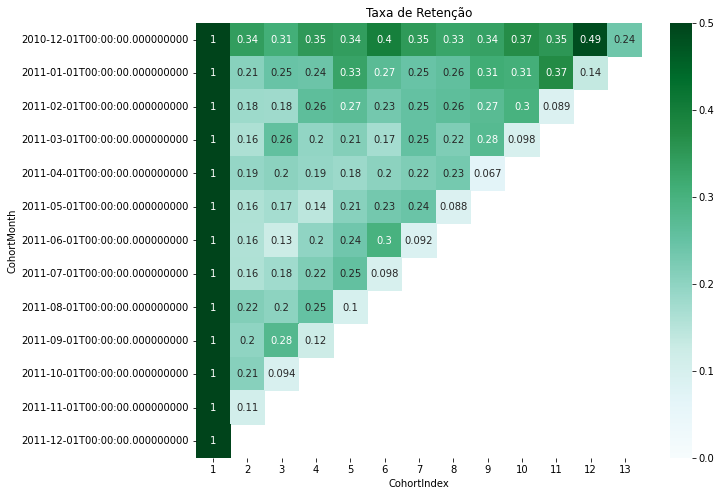

In [ ]:
plt.figure(figsize=(10,8))
plt.title("Taxa de Retenção")

sns.heatmap(
    data = retention, 
    annot = True,
    vmin = 0.0,
    vmax = 0.5,
    cmap = "BuGn"
)
plt.show()